In [3]:
import pandas as pd

air_quality = pd.read_csv('data/homework1.csv')

air_quality

,Row,Ozone,Wind,Temp
0,1,7,6.9,74
1,2,16,9.7,69
2,3,11,9.2,66
3,4,14,10.9,68
4,5,18,13.2,58
5,6,14,11.5,64
6,7,34,12.0,66
7,8,6,18.4,57
8,9,30,11.5,68
9,10,11,9.7,62


In [4]:
print(air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Row     10 non-null     int64  
 1   Ozone   10 non-null     int64  
 2   Wind    10 non-null     float64
 3   Temp    10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 452.0 bytes
None


In [5]:
print(air_quality.describe())

            Row      Ozone       Wind       Temp
count  10.00000  10.000000  10.000000  10.000000
mean    5.50000  16.100000  11.300000  65.200000
std     3.02765   9.206881   3.048497   5.159673
min     1.00000   6.000000   6.900000  57.000000
25%     3.25000  11.000000   9.700000  62.500000
50%     5.50000  14.000000  11.200000  66.000000
75%     7.75000  17.500000  11.875000  68.000000
max    10.00000  34.000000  18.400000  74.000000


In [6]:
air_quality['Ozone'] = air_quality['Ozone'].astype(float)
air_quality['Temp'] = air_quality['Temp'].astype(float)
print(air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Row     10 non-null     int64  
 1   Ozone   10 non-null     float64
 2   Wind    10 non-null     float64
 3   Temp    10 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 452.0 bytes
None


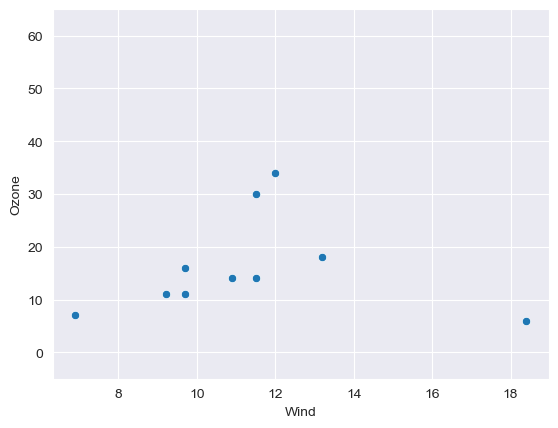

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Wind', y = 'Ozone', data=air_quality)
plt.ylim(ymin = -5,ymax=65)

plt.show()

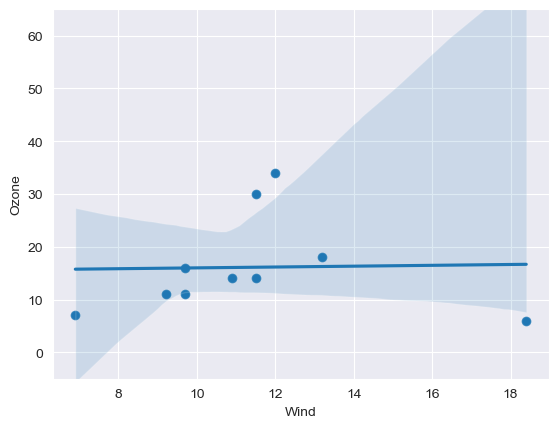

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Wind', y = 'Ozone', data=air_quality)
sns.regplot(x = 'Wind', y = 'Ozone', data=air_quality)
plt.ylim(ymin = -5,ymax=65)

plt.show()

In [9]:
variance = air_quality['Ozone'].var()
print('Variance of Ozone is',variance)

Variance of Ozone is 84.76666666666667


In [10]:
variance = air_quality['Wind'].var()
print('Variance of Wind is',variance)

Variance of Wind is 9.293333333333331


In [14]:
covariance = air_quality['Ozone'].cov(air_quality['Wind'])
print('Covariance of Ozone due to Wind is\n', covariance)

Covariance of Ozone due to Wind is
 0.7444444444444455


In [15]:
covariance = air_quality['Wind'].cov(air_quality['Ozone'])
print('Covariance of Wind due to Ozone is\n', covariance)

Covariance of Wind due to Ozone is
 0.7444444444444455


In [17]:
correlation = air_quality['Wind'].corr(air_quality['Ozone'])


print('correlation coefficient between wind and ozone is\n', correlation)

correlation coefficient between wind and ozone is
 0.026523692430649774


In [22]:
import statsmodels.api as sm
import numpy as np

# add a constant term for the intercept
X = sm.add_constant(air_quality['Wind'])  

model = sm.OLS(air_quality['Ozone'], X).fit()  # fit the model

intercept, slope = model.params  # get the estimated coefficients

fitted_model = f"Y = {intercept:.5f} + {slope:.5f} * X"
print(fitted_model)

Y = 15.19481 + 0.08011 * X
